In [1]:
import pandas as pd
import numpy as np
import warnings
# Disable warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('movie_metadata.csv')

In [3]:
data.head(10)

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   
5  Color     Andrew Stanton                   462.0     132.0   
6  Color          Sam Raimi                   392.0     156.0   
7  Color       Nathan Greno                   324.0     100.0   
8  Color        Joss Whedon                   635.0     141.0   
9  Color        David Yates                   375.0     153.0   

   director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
0                      0.0                   855.0   Joel David Moore   
1                    563.0                  1000.0      Orlando Bloom   
2                      0.0                   161.0       Rory Kinnear   
3                  22000.0                 23000.0     Christian Bale   
4                    131.0                     NaN         Rob Walker   
5                    475.0                   530.0    Samantha Morton   
6                      0.0                  4000.0       James Franco   
7                     15.0                   284.0       Donna Murphy   
8                      0.0                 19000.0  Robert Downey Jr.   
9                    282.0                 10000.0   Daniel Radcliffe   

   actor_1_facebook_likes        gross  \
0                  1000.0  760505847.0   
1                 40000.0  309404152.0   
2                 11000.0  200074175.0   
3                 27000.0  448130642.0   
4                   131.0          NaN   
5                   640.0   73058679.0   
6                 24000.0  336530303.0   
7                   799.0  200807262.0   
8                 26000.0  458991599.0   
9                 25000.0  301956980.0   

                                              genres  ...  \
0                    Action|Adventure|Fantasy|Sci-Fi  ...   
1                           Action|Adventure|Fantasy  ...   
2                          Action|Adventure|Thriller  ...   
3                                    Action|Thriller  ...   
4                                        Documentary  ...   
5                            Action|Adventure|Sci-Fi  ...   
6                           Action|Adventure|Romance  ...   
7  Adventure|Animation|Comedy|Family|Fantasy|Musi...  ...   
8                            Action|Adventure|Sci-Fi  ...   
9                   Adventure|Family|Fantasy|Mystery  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   
5                738.0  English      USA           PG-13  263700000.0   
6               1902.0  English      USA           PG-13  258000000.0   
7                387.0  English      USA              PG  260000000.0   
8               1117.0  English      USA           PG-13  250000000.0   
9                973.0  English       UK              PG  250000000.0   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   
5      2012.0                  632.0        6.6          2.35   
6      2007.0                11000.0        6.2          2.35   
7      2010.0           

In [4]:
data.shape

(5043, 28)

In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [7]:
j=0
for i in data["language"]:
    if i=="Hindi":
        j=j+1
print(j)

28


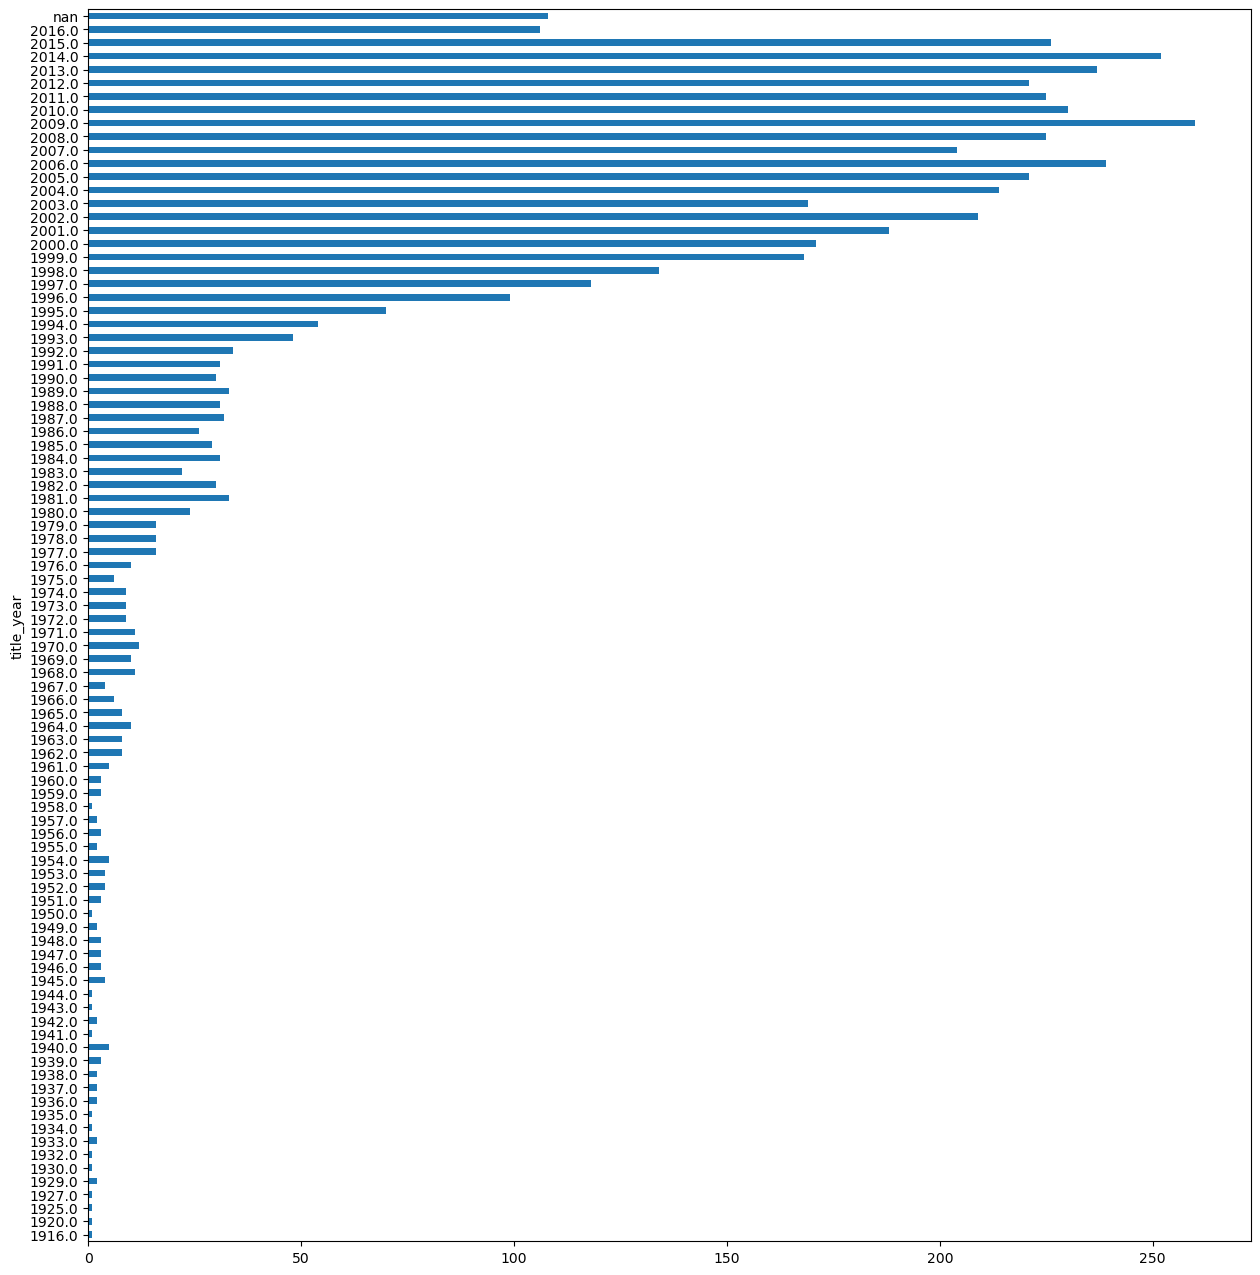

In [8]:
# we have movies only upto 2016
import matplotlib.pyplot as plt
data.title_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))
plt.show()

In [9]:
# recommendation will be based on these features only
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [10]:
data.head()

director_name     actor_1_name      actor_2_name          actor_3_name  \
0      James Cameron      CCH Pounder  Joel David Moore             Wes Studi   
1     Gore Verbinski      Johnny Depp     Orlando Bloom        Jack Davenport   
2         Sam Mendes  Christoph Waltz      Rory Kinnear      Stephanie Sigman   
3  Christopher Nolan        Tom Hardy    Christian Bale  Joseph Gordon-Levitt   
4        Doug Walker      Doug Walker        Rob Walker                   NaN   

                            genres  \
0  Action|Adventure|Fantasy|Sci-Fi   
1         Action|Adventure|Fantasy   
2        Action|Adventure|Thriller   
3                  Action|Thriller   
4                      Documentary   

                                         movie_title  
0                                            Avatar   
1          Pirates of the Caribbean: At World's End   
2                                           Spectre   
3                             The Dark Knight Rises   
4  Star Wars: Episode VII - The Force Awakens    ...

In [11]:
data['genres'] = data['genres'].str.replace('|', ' ')

In [12]:
data

director_name     actor_1_name      actor_2_name  \
0         James Cameron      CCH Pounder  Joel David Moore   
1        Gore Verbinski      Johnny Depp     Orlando Bloom   
2            Sam Mendes  Christoph Waltz      Rory Kinnear   
3     Christopher Nolan        Tom Hardy    Christian Bale   
4           Doug Walker      Doug Walker        Rob Walker   
...                 ...              ...               ...   
5038        Scott Smith      Eric Mabius     Daphne Zuniga   
5039                NaN      Natalie Zea     Valorie Curry   
5040   Benjamin Roberds      Eva Boehnke     Maxwell Moody   
5041        Daniel Hsia        Alan Ruck     Daniel Henney   
5042           Jon Gunn      John August  Brian Herzlinger   

              actor_3_name                           genres  \
0                Wes Studi  Action Adventure Fantasy Sci-Fi   
1           Jack Davenport         Action Adventure Fantasy   
2         Stephanie Sigman        Action Adventure Thriller   
3     Joseph Gordon-Levitt                  Action Thriller   
4                      NaN                      Documentary   
...                    ...                              ...   
5038          Crystal Lowe                     Comedy Drama   
5039         Sam Underwood     Crime Drama Mystery Thriller   
5040        David Chandler            Drama Horror Thriller   
5041           Eliza Coupe             Comedy Drama Romance   
5042              Jon Gunn                      Documentary   

                                            movie_title  
0                                               Avatar   
1             Pirates of the Caribbean: At World's End   
2                                              Spectre   
3                                The Dark Knight Rises   
4     Star Wars: Episode VII - The Force Awakens    ...  
...                                                 ...  
5038                           Signed Sealed Delivered   
5039                         The Following               
5040                              A Plague So Pleasant   
5041                                  Shanghai Calling   
5042                                 My Date with Drew   

[5043 rows x 6 columns]

In [13]:
def make_genresList(x):
    gen = []
    for i in x.split():
        if i == "Sci-Fi":
            scifi = 'Science Fiction'
            gen.append(scifi)
        else:
            gen.append(i)
    if gen == []:
        return np.NaN
    else:
        return (" ".join(gen))

In [14]:
data['genres'] = data['genres'].map(lambda x: make_genresList(x))
data['genres']

0       Action Adventure Fantasy Science Fiction
1                       Action Adventure Fantasy
2                      Action Adventure Thriller
3                                Action Thriller
4                                    Documentary
                          ...                   
5038                                Comedy Drama
5039                Crime Drama Mystery Thriller
5040                       Drama Horror Thriller
5041                        Comedy Drama Romance
5042                                 Documentary
Name: genres, Length: 5043, dtype: object

In [15]:
# null terminating char at the end
data['movie_title'][1]

"Pirates of the Caribbean: At World's End\xa0"

In [16]:
# removing the null terminating char at the end
data['movie_title'] = data['movie_title'].apply(lambda x : x[:-1])

In [17]:
data['movie_title'][1]

"Pirates of the Caribbean: At World's End"

In [18]:
data.isnull().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
movie_title        0
dtype: int64

In [19]:
data=data.dropna(how='any')

In [20]:
data

director_name     actor_1_name        actor_2_name  \
0         James Cameron      CCH Pounder    Joel David Moore   
1        Gore Verbinski      Johnny Depp       Orlando Bloom   
2            Sam Mendes  Christoph Waltz        Rory Kinnear   
3     Christopher Nolan        Tom Hardy      Christian Bale   
5        Andrew Stanton     Daryl Sabara     Samantha Morton   
...                 ...              ...                 ...   
5037       Edward Burns      Kerry Bishé  Caitlin FitzGerald   
5038        Scott Smith      Eric Mabius       Daphne Zuniga   
5040   Benjamin Roberds      Eva Boehnke       Maxwell Moody   
5041        Daniel Hsia        Alan Ruck       Daniel Henney   
5042           Jon Gunn      John August    Brian Herzlinger   

              actor_3_name                                    genres  \
0                Wes Studi  Action Adventure Fantasy Science Fiction   
1           Jack Davenport                  Action Adventure Fantasy   
2         Stephanie Sigman                 Action Adventure Thriller   
3     Joseph Gordon-Levitt                           Action Thriller   
5             Polly Walker          Action Adventure Science Fiction   
...                    ...                                       ...   
5037       Daniella Pineda                              Comedy Drama   
5038          Crystal Lowe                              Comedy Drama   
5040        David Chandler                     Drama Horror Thriller   
5041           Eliza Coupe                      Comedy Drama Romance   
5042              Jon Gunn                               Documentary   

                                   movie_title  
0                                       Avatar  
1     Pirates of the Caribbean: At World's End  
2                                      Spectre  
3                        The Dark Knight Rises  
5                                  John Carter  
...                                        ...  
5037                                 Newlyweds  
5038                   Signed Sealed Delivered  
5040                      A Plague So Pleasant  
5041                          Shanghai Calling  
5042                         My Date with Drew  

[4919 rows x 6 columns]

In [21]:
old=data

In [22]:
old['director_name']=old['director_name'].apply(lambda x:x.replace(" ",""))
old['actor_1_name']=old['actor_1_name'].apply(lambda x:x.replace(" ",""))
old['actor_2_name']=old['actor_2_name'].apply(lambda x:x.replace(" ",""))
old['actor_3_name']=old['actor_3_name'].apply(lambda x:x.replace(" ",""))

In [23]:
old

director_name    actor_1_name       actor_2_name  \
0         JamesCameron      CCHPounder     JoelDavidMoore   
1        GoreVerbinski      JohnnyDepp       OrlandoBloom   
2            SamMendes  ChristophWaltz        RoryKinnear   
3     ChristopherNolan        TomHardy      ChristianBale   
5        AndrewStanton     DarylSabara     SamanthaMorton   
...                ...             ...                ...   
5037       EdwardBurns      KerryBishé  CaitlinFitzGerald   
5038        ScottSmith      EricMabius       DaphneZuniga   
5040   BenjaminRoberds      EvaBoehnke       MaxwellMoody   
5041        DanielHsia        AlanRuck       DanielHenney   
5042           JonGunn      JohnAugust    BrianHerzlinger   

             actor_3_name                                    genres  \
0                WesStudi  Action Adventure Fantasy Science Fiction   
1           JackDavenport                  Action Adventure Fantasy   
2         StephanieSigman                 Action Adventure Thriller   
3     JosephGordon-Levitt                           Action Thriller   
5             PollyWalker          Action Adventure Science Fiction   
...                   ...                                       ...   
5037       DaniellaPineda                              Comedy Drama   
5038          CrystalLowe                              Comedy Drama   
5040        DavidChandler                     Drama Horror Thriller   
5041           ElizaCoupe                      Comedy Drama Romance   
5042              JonGunn                               Documentary   

                                   movie_title  
0                                       Avatar  
1     Pirates of the Caribbean: At World's End  
2                                      Spectre  
3                        The Dark Knight Rises  
5                                  John Carter  
...                                        ...  
5037                                 Newlyweds  
5038                   Signed Sealed Delivered  
5040                      A Plague So Pleasant  
5041                          Shanghai Calling  
5042                         My Date with Drew  

[4919 rows x 6 columns]

In [24]:
old['tag'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']
old['tag']=old['tag'].apply(lambda x:x.lower())
old=old[["movie_title","tag"]]
old

movie_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
5                                  John Carter   
...                                        ...   
5037                                 Newlyweds   
5038                   Signed Sealed Delivered   
5040                      A Plague So Pleasant   
5041                          Shanghai Calling   
5042                         My Date with Drew   

                                                    tag  
0     cchpounder joeldavidmoore wesstudi jamescamero...  
1     johnnydepp orlandobloom jackdavenport goreverb...  
2     christophwaltz rorykinnear stephaniesigman sam...  
3     tomhardy christianbale josephgordon-levitt chr...  
5     darylsabara samanthamorton pollywalker andrews...  
...                                                 ...  
5037  kerrybishé caitlinfitzgerald daniellapineda ed...  
5038  ericmabius daphnezuniga crystallowe scottsmith...  
5040  evaboehnke maxwellmoody davidchandler benjamin...  
5041  alanruck danielhenney elizacoupe danielhsia co...  
5042  johnaugust brianherzlinger jongunn jongunn doc...  

[4919 rows x 2 columns]

In [25]:
from tmdbv3api import TMDb
tmdb = TMDb()
tmdb.api_key = 'bd9d93e4649f8d7b42731beda117f8c6'
from tmdbv3api import Movie
tmdb_movie = Movie()
from tqdm import tqdm
tqdm.pandas()

def get_id(x):
    result = tmdb_movie.search(x)
    if not result:
        return np.NaN
    else:
        movie_id = result[0].id
        return movie_id

# Modify the function to print the index and title, and handle the error
def safe_get_id(title, index):
    try:
        return get_id(title)
    except Exception as e:
        print(f"Error processing index: {index}")
        print(f"Title: {title}")
        print(f"Error: {e}")
        return np.NaN

# Apply the function with progress bar
old['id'] = old.progress_apply(lambda row: safe_get_id(str(row['movie_title']), row.name), axis=1)

 16%|████████████▊                                                                  | 799/4919 [09:53<56:20,  1.22it/s]

Error processing index: 810
Title: Xi you ji zhi: Sun Wukong san da Baigu Jing
Error: attribute name must be string, not 'int'


 57%|████████████████████████████████████████████▌                                 | 2813/4919 [40:09<42:48,  1.22s/it]

Error processing index: 2870
Title: Del 1 - Män som hatar kvinnor            
Error: attribute name must be string, not 'int'


 70%|██████████████████████████████████████████████████████▉                       | 3467/4919 [49:16<21:41,  1.12it/s]

Error processing index: 3539
Title: Alpha and Omega 4: The Legend of the Saw Toothed Cave
Error: attribute name must be string, not 'int'


 80%|██████████████████████████████████████████████████████████████▎               | 3931/4919 [56:03<12:10,  1.35it/s]

Error processing index: 4019
Title: In the Name of the King: The Last Job
Error: attribute name must be string, not 'int'


 83%|████████████████████████████████████████████████████████████████▌             | 4070/4919 [57:55<10:50,  1.31it/s]

Error processing index: 4163
Title: Sardaar Ji
Error: attribute name must be string, not 'int'


 83%|████████████████████████████████████████████████████████████████▋             | 4083/4919 [58:04<08:59,  1.55it/s]

Error processing index: 4176
Title: Silver Medallist
Error: attribute name must be string, not 'int'


 85%|██████████████████████████████████████████████████████████████████▋           | 4205/4919 [59:43<10:02,  1.18it/s]

Error processing index: 4302
Title: 24 7: Twenty Four Seven
Error: attribute name must be string, not 'int'


 89%|███████████████████████████████████████████████████████████████████▉        | 4399/4919 [1:02:12<08:00,  1.08it/s]

Error processing index: 4501
Title: Down and Out with the Dolls
Error: attribute name must be string, not 'int'


 95%|████████████████████████████████████████████████████████████████████████    | 4663/4919 [1:06:15<03:03,  1.39it/s]

Error processing index: 4771
Title: The King of Najayo
Error: attribute name must be string, not 'int'


100%|███████████████████████████████████████████████████████████████████████████▉| 4915/4919 [1:10:08<00:03,  1.06it/s]

Error processing index: 5036
Title: The Mongol King
Error: attribute name must be string, not 'int'


100%|████████████████████████████████████████████████████████████████████████████| 4919/4919 [1:10:13<00:00,  1.17it/s]


In [26]:
old=old.dropna(how='any')
old["id"]=old["id"].astype("int")

In [27]:
old

movie_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
5                                  John Carter   
...                                        ...   
5037                                 Newlyweds   
5038                   Signed Sealed Delivered   
5040                      A Plague So Pleasant   
5041                          Shanghai Calling   
5042                         My Date with Drew   

                                                    tag      id  
0     cchpounder joeldavidmoore wesstudi jamescamero...   19995  
1     johnnydepp orlandobloom jackdavenport goreverb...     285  
2     christophwaltz rorykinnear stephaniesigman sam...  206647  
3     tomhardy christianbale josephgordon-levitt chr...   49026  
5     darylsabara samanthamorton pollywalker andrews...   49529  
...                                                 ...     ...  
5037  kerrybishé caitlinfitzgerald daniellapineda ed...   72766  
5038  ericmabius daphnezuniga crystallowe scottsmith...  231617  
5040  evaboehnke maxwellmoody davidchandler benjamin...  365441  
5041  alanruck danielhenney elizacoupe danielhsia co...  126186  
5042  johnaugust brianherzlinger jongunn jongunn doc...   25975  

[4909 rows x 3 columns]

In [28]:
## Adding Movie Data from 2017

In [29]:
credits = pd.read_csv('credits.csv')
credits

cast  \
0      [{'cast_id': 14, 'character': 'Woody (voice)',...   
1      [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2      [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3      [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4      [{'cast_id': 1, 'character': 'George Banks', '...   
...                                                  ...   
45471  [{'cast_id': 0, 'character': '', 'credit_id': ...   
45472  [{'cast_id': 1002, 'character': 'Sister Angela...   
45473  [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...   
45474  [{'cast_id': 2, 'character': '', 'credit_id': ...   
45475                                                 []   

                                                    crew      id  
0      [{'credit_id': '52fe4284c3a36847f8024f49', 'de...     862  
1      [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...    8844  
2      [{'credit_id': '52fe466a9251416c75077a89', 'de...   15602  
3      [{'credit_id': '52fe44779251416c91011acb', 'de...   31357  
4      [{'credit_id': '52fe44959251416c75039ed7', 'de...   11862  
...                                                  ...     ...  
45471  [{'credit_id': '5894a97d925141426c00818c', 'de...  439050  
45472  [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...  111109  
45473  [{'credit_id': '52fe4776c3a368484e0c8387', 'de...   67758  
45474  [{'credit_id': '533bccebc3a36844cf0011a7', 'de...  227506  
45475  [{'credit_id': '593e676c92514105b702e68e', 'de...  461257  

[45476 rows x 3 columns]

In [30]:
meta = pd.read_csv('movies_metadata.csv')
meta

adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2      A family wedding reignites the ancient feud be...  ...   1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4      Just when George Banks has recovered from his ...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisati

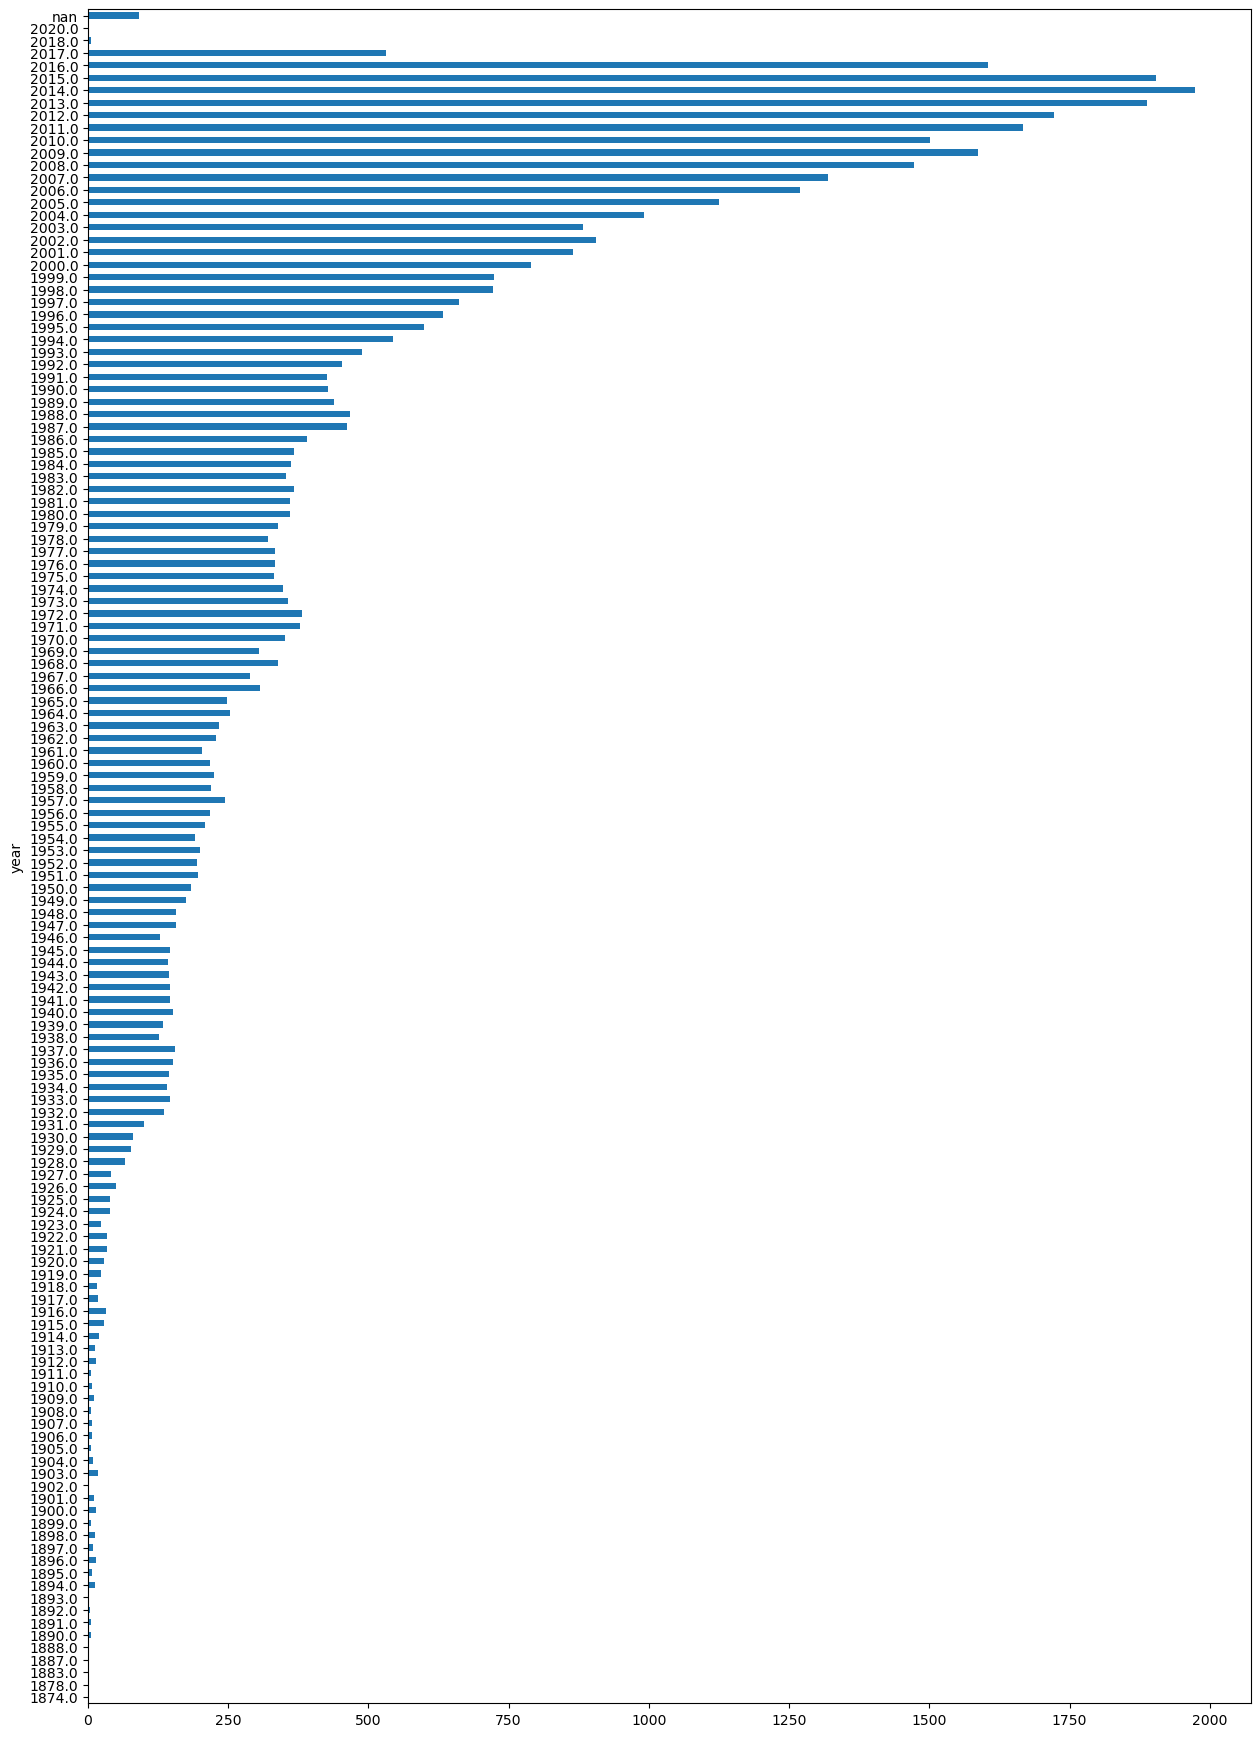

In [31]:
meta['release_date'] = pd.to_datetime(meta['release_date'], errors='coerce')
meta['year'] = meta['release_date'].dt.year
meta['year'].value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,22))
plt.show()

In [32]:
# Getting only 2017 movies as we already have movies up to the year 2016 in preprocessing 1 file. 
# We don't have enough data for the movies from 2018, 2019 and 2020. 
# We'll deal with it in the upcoming preprocessing files

new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]
new_meta

genres      id  \
26560  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...  166426   
26561  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  141052   
26565  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  284053   
26566  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  283995   
30536  [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...  245842   
...                                                  ...     ...   
45398  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  468707   
45417  [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...  461297   
45437  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...  455661   
45453  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...  404604   
45465                                                 []  461257   

                                                  title    year  
26560  Pirates of the Caribbean: Dead Men Tell No Tales  2017.0  
26561                                    Justice League  2017.0  
26565                                    Thor: Ragnarok  2017.0  
26566                    Guardians of the Galaxy Vol. 2  2017.0  
30536                               The King's Daughter  2017.0  
...                                                 ...     ...  
45398                  Thick Lashes of Lauri Mäntyvaara  2017.0  
45417                       Cop and a Half: New Recruit  2017.0  
45437                                    In a Heartbeat  2017.0  
45453                                               Mom  2017.0  
45465                                          Queerama  2017.0  

[532 rows x 4 columns]

In [33]:
print(new_meta["id"].info())
print(" ")
print(credits["id"].info())

<class 'pandas.core.series.Series'>
Index: 532 entries, 26560 to 45465
Series name: id
Non-Null Count  Dtype 
--------------  ----- 
532 non-null    object
dtypes: object(1)
memory usage: 8.3+ KB
None
 
<class 'pandas.core.series.Series'>
RangeIndex: 45476 entries, 0 to 45475
Series name: id
Non-Null Count  Dtype
--------------  -----
45476 non-null  int64
dtypes: int64(1)
memory usage: 355.4 KB
None


In [34]:
new_meta['id'] = new_meta['id'].astype(int)

In [35]:
data = pd.merge(new_meta, credits, on='id')
data

genres      id  \
0    [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...  166426   
1    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  141052   
2    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  284053   
3    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  283995   
4    [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...  245842   
..                                                 ...     ...   
526  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  468707   
527  [{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...  461297   
528  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...  455661   
529  [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...  404604   
530                                                 []  461257   

                                                title    year  \
0    Pirates of the Caribbean: Dead Men Tell No Tales  2017.0   
1                                      Justice League  2017.0   
2                                      Thor: Ragnarok  2017.0   
3                      Guardians of the Galaxy Vol. 2  2017.0   
4                                 The King's Daughter  2017.0   
..                                                ...     ...   
526                  Thick Lashes of Lauri Mäntyvaara  2017.0   
527                       Cop and a Half: New Recruit  2017.0   
528                                    In a Heartbeat  2017.0   
529                                               Mom  2017.0   
530                                          Queerama  2017.0   

                                                  cast  \
0    [{'cast_id': 1, 'character': 'Captain Jack Spa...   
1    [{'cast_id': 2, 'character': 'Bruce Wayne / Ba...   
2    [{'cast_id': 0, 'character': 'Thor Odinson', '...   
3    [{'cast_id': 3, 'character': 'Peter Quill / St...   
4    [{'cast_id': 0, 'character': 'King Louis XIV',...   
..                                                 ...   
526  [{'cast_id': 0, 'character': 'Satu', 'credit_i...   
527  [{'cast_id': 0, 'character': 'Detective Simmon...   
528                                                 []   
529  [{'cast_id': 1, 'character': 'Devki Sabarwal',...   
530                                                 []   

                                                  crew  
0    [{'credit_id': '52fe4c9cc3a36847f8236a65', 'de...  
1    [{'credit_id': '55ef66dbc3a3686f1700a52d', 'de...  
2    [{'credit_id': '56a93fa4c3a36872db001e7a', 'de...  
3    [{'credit_id': '59171547925141583c0315a6', 'de...  
4    [{'credit_id': '5431de49c3a36825d300007e', 'de...  
..                                                 ...  
526  [{'credit_id': '597e22f69251415d7801c74a', 'de...  
527  [{'credit_id': '593ba0c29251410593009be3', 'de...  
528  [{'credit_id': '5981a15c92514151e0011b51', 'de...  
529  [{'credit_id': '58ee55bbc3a3683df500bd0f', 'de...  
530  [{'credit_id': '593e676c92514105b702e68e', 'de...  

[531 rows x 6 columns]

In [36]:
print(data['genres'][0])
type(data['genres'][0])

[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy'}, {'id': 35, 'name': 'Comedy'}]


str

In [37]:
import ast
print(data['genres'].map(lambda x: ast.literal_eval(x))[0])
type(data['genres'].map(lambda x: ast.literal_eval(x))[0])

[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 14, 'name': 'Fantasy'}, {'id': 35, 'name': 'Comedy'}]


list

In [38]:
# evaluates an expression node or a string containing a Python literal or container display
import ast
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [39]:
names = []
for i in data['genres']:
    for genre in i:
        names.append(genre['name'])
print(set(names))

{'Horror', 'Drama', 'Romance', 'TV Movie', 'Action', 'War', 'Documentary', 'Fantasy', 'Science Fiction', 'Mystery', 'Western', 'Music', 'Thriller', 'History', 'Crime', 'Adventure', 'Comedy', 'Family', 'Animation'}


In [40]:
def make_genresList(x):
    gen = []
    st = " "
    for i in x:
            gen.append(i['name'])
    if gen == []:
        return np.NaN
    else:
        return (st.join(gen))

In [41]:
data['genres'] = data['genres'].map(lambda x: make_genresList(x))
data['genres']

0               Adventure Action Fantasy Comedy
1      Action Adventure Fantasy Science Fiction
2      Action Adventure Fantasy Science Fiction
3       Action Adventure Comedy Science Fiction
4                      Fantasy Action Adventure
                         ...                   
526                              Romance Comedy
527                  Crime Comedy Action Family
528             Family Animation Romance Comedy
529                        Crime Drama Thriller
530                                         NaN
Name: genres, Length: 531, dtype: object

In [42]:
data['cast'][0]

[{'cast_id': 1,
  'character': 'Captain Jack Sparrow',
  'credit_id': '52fe4c9cc3a36847f8236a53',
  'gender': 2,
  'id': 85,
  'name': 'Johnny Depp',
  'order': 0,
  'profile_path': '/kbWValANhZI8rbWZXximXuMN4UN.jpg'},
 {'cast_id': 9,
  'character': 'Captain Armando Salazar',
  'credit_id': '54db4949c3a368122d0017fe',
  'gender': 2,
  'id': 3810,
  'name': 'Javier Bardem',
  'order': 1,
  'profile_path': '/grBOK7Ep09JBE3H5LyV5JaZZ1XZ.jpg'},
 {'cast_id': 16,
  'character': 'Captain Hector Barbossa',
  'credit_id': '54e44e5ec3a368454b00a02f',
  'gender': 2,
  'id': 118,
  'name': 'Geoffrey Rush',
  'order': 2,
  'profile_path': '/5h91WHSK80YtqTk1bMiar2IZzO2.jpg'},
 {'cast_id': 7,
  'character': 'Henry Turner',
  'credit_id': '54db49359251415a0d0012a0',
  'gender': 2,
  'id': 1017347,
  'name': 'Brenton Thwaites',
  'order': 3,
  'profile_path': '/dM0m0OxREfW4HxwV2qQeitS8dfO.jpg'},
 {'cast_id': 8,
  'character': 'Carina Smyth',
  'credit_id': '54db493e925141618f00189a',
  'gender': 1,
  '

In [43]:
def get_actor1(x):
    casts = []
    for i in x:
        casts.append(i['name'])
    if casts == []:
        return np.NaN
    else:
        return (casts[0])

In [44]:
data['actor_1_name'] = data['cast'].map(lambda x: get_actor1(x))
data['actor_1_name']

0               Johnny Depp
1               Ben Affleck
2           Chris Hemsworth
3               Chris Pratt
4            Pierce Brosnan
               ...         
526          Inka Haapamäki
527    Lou Diamond Phillips
528                     NaN
529          Sridevi Kapoor
530                     NaN
Name: actor_1_name, Length: 531, dtype: object

In [45]:
def get_actor2(x):
    casts = []
    for i in x:
        casts.append(i['name'])
    if casts == [] or len(casts)<=1:
        return np.NaN
    else:
        return (casts[1])

In [46]:
data['actor_2_name'] = data['cast'].map(lambda x: get_actor2(x))
data['actor_2_name']

0       Javier Bardem
1        Henry Cavill
2      Tom Hiddleston
3         Zoe Saldana
4        William Hurt
            ...      
526     Rosa Honkonen
527     Wallace Shawn
528               NaN
529         Sajal Ali
530               NaN
Name: actor_2_name, Length: 531, dtype: object

In [47]:
def get_actor3(x):
    casts = []
    for i in x:
        casts.append(i['name'])
    if casts == [] or len(casts)<=2:
        return np.NaN
    else:
        return (casts[2])

In [48]:
data['actor_3_name'] = data['cast'].map(lambda x: get_actor3(x))
data['actor_3_name']

0        Geoffrey Rush
1            Gal Gadot
2       Cate Blanchett
3        Dave Bautista
4      Benjamin Walker
            ...       
526     Tiitus Rantala
527        Gina Holden
528                NaN
529     Akshaye Khanna
530                NaN
Name: actor_3_name, Length: 531, dtype: object

In [49]:
data["crew"][0]

[{'credit_id': '52fe4c9cc3a36847f8236a65',
  'department': 'Production',
  'gender': 2,
  'id': 770,
  'job': 'Producer',
  'name': 'Jerry Bruckheimer',
  'profile_path': '/lQu9eRzRX264j2LFQwvKC50wb9s.jpg'},
 {'credit_id': '592f443cc3a3685cf7000019',
  'department': 'Writing',
  'gender': 2,
  'id': 1705,
  'job': 'Characters',
  'name': 'Ted Elliott',
  'profile_path': '/9OXGC59dpVDdfwSeEdHgxpoHXVu.jpg'},
 {'credit_id': '591298d6c3a36864fc04d1a4',
  'department': 'Production',
  'gender': 2,
  'id': 1706,
  'job': 'Executive Producer',
  'name': 'Terry Rossio',
  'profile_path': '/zvlhzykondhUf26gknMo8hLMuCn.jpg'},
 {'credit_id': '52fe4c9cc3a36847f8236a5f',
  'department': 'Writing',
  'gender': 2,
  'id': 1706,
  'job': 'Characters',
  'name': 'Terry Rossio',
  'profile_path': '/zvlhzykondhUf26gknMo8hLMuCn.jpg'},
 {'credit_id': '591298289251414e8904f223',
  'department': 'Writing',
  'gender': 2,
  'id': 1706,
  'job': 'Story',
  'name': 'Terry Rossio',
  'profile_path': '/zvlhzykond

In [50]:
def get_directors(x):
    dt = []
    st = " "
    for i in x:
        if i['job'] == 'Director':
            dt.append(i['name'])
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [51]:
data['director_name'] = data['crew'].map(lambda x: get_directors(x))
data['director_name']

0      Joachim Rønning Espen Sandberg
1                         Zack Snyder
2                       Taika Waititi
3                          James Gunn
4                       Sean McNamara
                    ...              
526                  Hannaleena Hauru
527             Jonathan A. Rosenbaum
528          Beth David Esteban Bravo
529                      Ravi Udyawar
530                     Daisy Asquith
Name: director_name, Length: 531, dtype: object

In [52]:
movie = data.loc[:,['id','director_name','actor_1_name','actor_2_name','actor_3_name','genres','title']]
movie

id                   director_name          actor_1_name  \
0    166426  Joachim Rønning Espen Sandberg           Johnny Depp   
1    141052                     Zack Snyder           Ben Affleck   
2    284053                   Taika Waititi       Chris Hemsworth   
3    283995                      James Gunn           Chris Pratt   
4    245842                   Sean McNamara        Pierce Brosnan   
..      ...                             ...                   ...   
526  468707                Hannaleena Hauru        Inka Haapamäki   
527  461297           Jonathan A. Rosenbaum  Lou Diamond Phillips   
528  455661        Beth David Esteban Bravo                   NaN   
529  404604                    Ravi Udyawar        Sridevi Kapoor   
530  461257                   Daisy Asquith                   NaN   

       actor_2_name     actor_3_name  \
0     Javier Bardem    Geoffrey Rush   
1      Henry Cavill        Gal Gadot   
2    Tom Hiddleston   Cate Blanchett   
3       Zoe Saldana    Dave Bautista   
4      William Hurt  Benjamin Walker   
..              ...              ...   
526   Rosa Honkonen   Tiitus Rantala   
527   Wallace Shawn      Gina Holden   
528             NaN              NaN   
529       Sajal Ali   Akshaye Khanna   
530             NaN              NaN   

                                       genres  \
0             Adventure Action Fantasy Comedy   
1    Action Adventure Fantasy Science Fiction   
2    Action Adventure Fantasy Science Fiction   
3     Action Adventure Comedy Science Fiction   
4                    Fantasy Action Adventure   
..                                        ...   
526                            Romance Comedy   
527                Crime Comedy Action Family   
528           Family Animation Romance Comedy   
529                      Crime Drama Thriller   
530                                       NaN   

                                                title  
0    Pirates of the Caribbean: Dead Men Tell No Tales  
1                                      Justice League  
2                                      Thor: Ragnarok  
3                      Guardians of the Galaxy Vol. 2  
4                                 The King's Daughter  
..                                                ...  
526                  Thick Lashes of Lauri Mäntyvaara  
527                       Cop and a Half: New Recruit  
528                                    In a Heartbeat  
529                                               Mom  
530                                          Queerama  

[531 rows x 7 columns]

In [53]:
movie.isna().sum()

id                0
director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres            7
title             0
dtype: int64

In [54]:
movie = movie.dropna(how='any')

In [55]:
movie = movie.rename(columns={'title':'movie_title'})

In [56]:
movie['director_name']=movie['director_name'].apply(lambda x:x.replace(" ",""))
movie['actor_1_name']=movie['actor_1_name'].apply(lambda x:x.replace(" ",""))
movie['actor_2_name']=movie['actor_2_name'].apply(lambda x:x.replace(" ",""))
movie['actor_3_name']=movie['actor_3_name'].apply(lambda x:x.replace(" ",""))

In [57]:
movie['tag'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']
movie['tag']=movie['tag'].apply(lambda x:x.lower())

In [58]:
movie=movie[["id","movie_title","tag"]]
movie

id                                       movie_title  \
0    166426  Pirates of the Caribbean: Dead Men Tell No Tales   
1    141052                                    Justice League   
2    284053                                    Thor: Ragnarok   
3    283995                    Guardians of the Galaxy Vol. 2   
4    245842                               The King's Daughter   
..      ...                                               ...   
524  432789                      The Incredible Jessica James   
525  445126                                 Can't Buy My Love   
526  468707                  Thick Lashes of Lauri Mäntyvaara   
527  461297                       Cop and a Half: New Recruit   
529  404604                                               Mom   

                                                   tag  
0    johnnydepp javierbardem geoffreyrush joachimrø...  
1    benaffleck henrycavill galgadot zacksnyder act...  
2    chrishemsworth tomhiddleston cateblanchett tai...  
3    chrispratt zoesaldana davebautista jamesgunn a...  
4    piercebrosnan williamhurt benjaminwalker seanm...  
..                                                 ...  
524  jessicawilliams chriso'dowd keithstanfield jim...  
525  adelaidekane benjaminhollingsworth jeanlouisak...  
526  inkahaapamäki rosahonkonen tiitusrantala hanna...  
527  loudiamondphillips wallaceshawn ginaholden jon...  
529  sridevikapoor sajalali akshayekhanna raviudyaw...  

[458 rows x 3 columns]

In [59]:
new = pd.concat([old, movie], ignore_index=True)
new

movie_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
5362              The Incredible Jessica James   
5363                         Can't Buy My Love   
5364          Thick Lashes of Lauri Mäntyvaara   
5365               Cop and a Half: New Recruit   
5366                                       Mom   

                                                    tag      id  
0     cchpounder joeldavidmoore wesstudi jamescamero...   19995  
1     johnnydepp orlandobloom jackdavenport goreverb...     285  
2     christophwaltz rorykinnear stephaniesigman sam...  206647  
3     tomhardy christianbale josephgordon-levitt chr...   49026  
4     darylsabara samanthamorton pollywalker andrews...   49529  
...                                                 ...     ...  
5362  jessicawilliams chriso'dowd keithstanfield jim...  432789  
5363  adelaidekane benjaminhollingsworth jeanlouisak...  445126  
5364  inkahaapamäki rosahonkonen tiitusrantala hanna...  468707  
5365  loudiamondphillips wallaceshawn ginaholden jon...  461297  
5366  sridevikapoor sajalali akshayekhanna raviudyaw...  404604  

[5367 rows x 3 columns]

In [60]:
new.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)
new

movie_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
5362              The Incredible Jessica James   
5363                         Can't Buy My Love   
5364          Thick Lashes of Lauri Mäntyvaara   
5365               Cop and a Half: New Recruit   
5366                                       Mom   

                                                    tag      id  
0     cchpounder joeldavidmoore wesstudi jamescamero...   19995  
1     johnnydepp orlandobloom jackdavenport goreverb...     285  
2     christophwaltz rorykinnear stephaniesigman sam...  206647  
3     tomhardy christianbale josephgordon-levitt chr...   49026  
4     darylsabara samanthamorton pollywalker andrews...   49529  
...                                                 ...     ...  
5362  jessicawilliams chriso'dowd keithstanfield jim...  432789  
5363  adelaidekane benjaminhollingsworth jeanlouisak...  445126  
5364  inkahaapamäki rosahonkonen tiitusrantala hanna...  468707  
5365  loudiamondphillips wallaceshawn ginaholden jon...  461297  
5366  sridevikapoor sajalali akshayekhanna raviudyaw...  404604  

[5232 rows x 3 columns]

In [61]:
new.to_csv('till 2017.csv',index=False)